<h1 style="font-size:300%; background-color:#ffe4b5; color:#4b0082; text-align:center; line-height : 60px;">
Proyecto del curso - Clasificación de flechas de arquería</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Escudo_de_la_Universidad_Nacional_de_Colombia_%282016%29.svg/598px-Escudo_de_la_Universidad_Nacional_de_Colombia_%282016%29.svg.png" alt="Escudo UNAL" style="width:200px;height:250px;">

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>Ana Sofía Aponte Barriga<br>David Felipe Silva Chacón</p>

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>Técnicas de Inteligencia Artificial - Visión de Máquina</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>Septiembre de 2022</p>

In [1]:
#!pip install opencv-python
#!pip install matplotlib

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import math as m
import random
import os

In [3]:
def plot(pic,title='',color=False):
    if color:
        plt.imshow(pic)
    else:
        plt.imshow(pic,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

In [4]:
# carga y umbralizacion
picList = os.listdir('img2')
i = 0
imgList = []
picName = []
for pic in picList:
    pic = "img2/" + pic
    img = cv2.imread(pic)
    picName.append(pic)
    img = cv2.resize(img, (1200, 900), interpolation= cv2.INTER_LINEAR)
    width = img.shape[1]
    height = img.shape[0]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    threshType, threshImg = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY)
    filteredImg = cv2.bilateralFilter(threshImg, 5, 80, 80)
    noiselessImg = cv2.fastNlMeansDenoising(filteredImg, None, 50, 7, 21)
    imgList.append(noiselessImg)
    x = 0
    y = 0
    yfin = 0
    colSuma = np.sum(imgList[i], 0)
    for j in range(len(colSuma)) :
        if colSuma[j] < 255*(height-10) :
            x = j
            break
    filSuma = np.sum(imgList[i], 1)
    for k in range(len(filSuma)) :
        if filSuma[k] < 255*(height-1) :
            y = k
            break
    for l in reversed(range(len(filSuma))) :
        if filSuma[l] < 255*(height-1) :
            yfin = l
            break
    if y < 100:
        roi = [x, 0, 500, 300]
    else:
        roi = [x, y-80, 400, 200]
    imgList[i] = imgList[i][int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]
    #plt.imshow(imgList[i], cmap = plt.cm.gray)
    #plt.show()
    i = i+1

In [5]:
# deteccion de bordes
i = 0
edgeList = []
hList = []
for image in imgList:
    edge = cv2.Canny(image, 100,200)
    kernel = np.ones((5,5),np.uint8)
    edge = cv2.dilate(edge, kernel, iterations = 1)
    edge = cv2.medianBlur(edge, 5)
    edge = cv2.morphologyEx(edge, cv2.MORPH_OPEN, kernel)
    edgeList.append(cv2.bitwise_not(edge))
    width = edgeList[i].shape[1]
    height = edgeList[i].shape[0]
    x = 0
    y = 0
    colSuma = np.sum(edgeList[i], 0)
    for j in range(len(colSuma)) :
        if colSuma[j] < 255*(height-10) :
            x = j
            break
    filSuma = np.sum(edgeList[i], 1)
    for k in range(len(filSuma)) :
        for kk in range(width):
            if edgeList[i][k][kk] == 0 :
                y = k
                break
    for l in reversed(range(len(filSuma))) :
        for ll in range(width):
            if edgeList[i][l][ll] == 0 :
                yfin = l
                break
    roi = [x, yfin, 400, y-yfin]
    hList.append(y-yfin)
    edgeList[i] = edgeList[i][int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]
    #plt.imshow(edgeList[i], cmap = plt.cm.gray)
    #plt.show()
    i = i+1

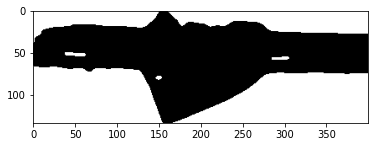

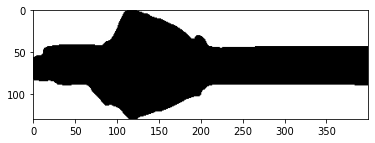

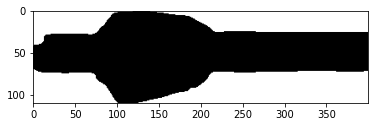

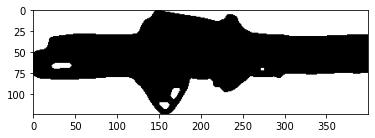

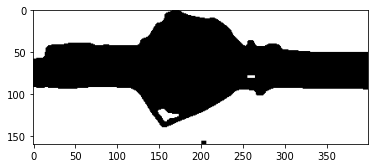

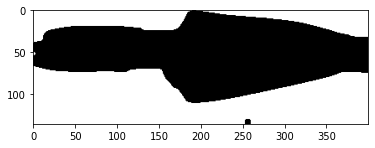

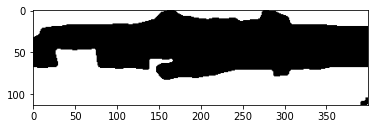

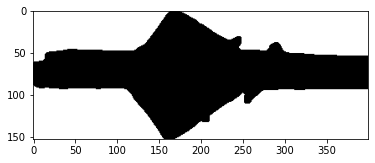

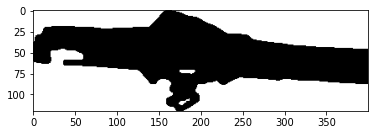

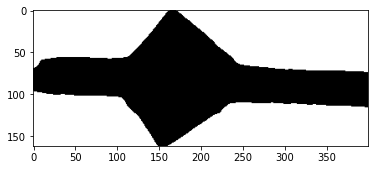

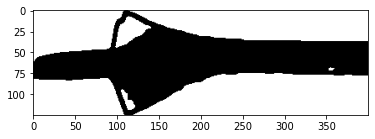

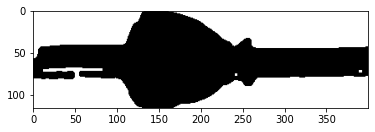

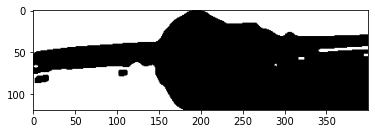

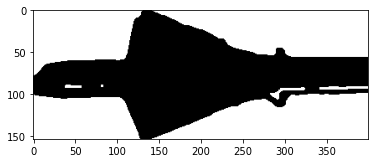

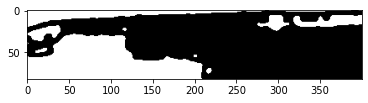

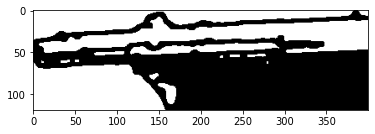

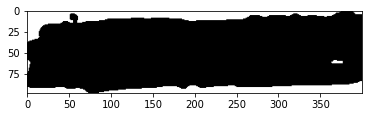

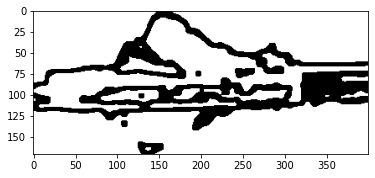

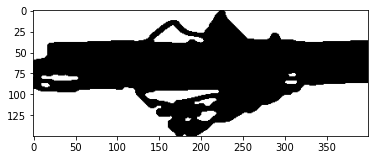

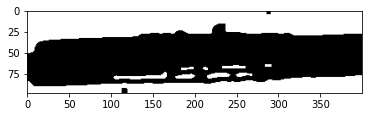

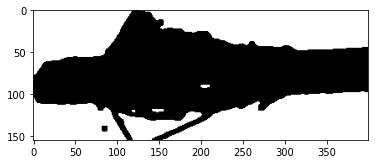

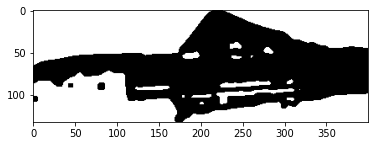

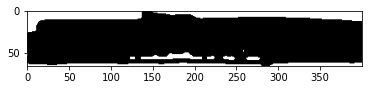

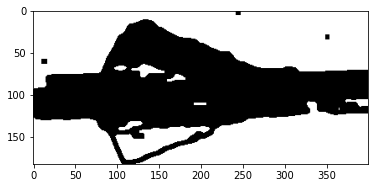

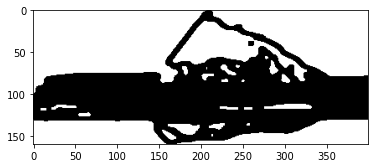

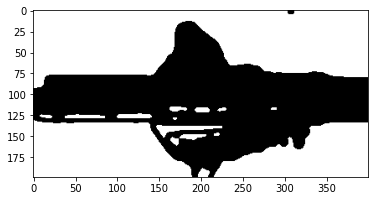

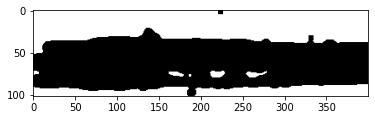

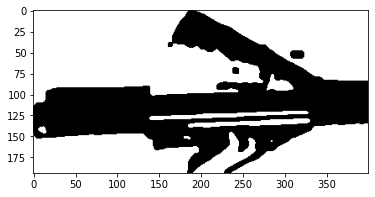

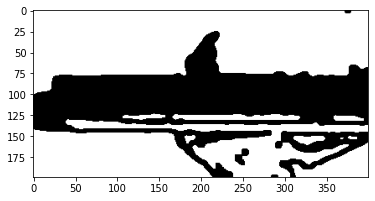

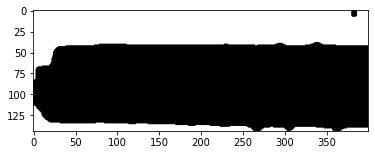

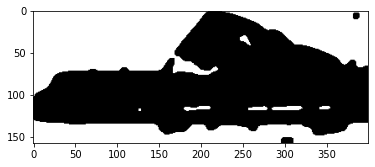

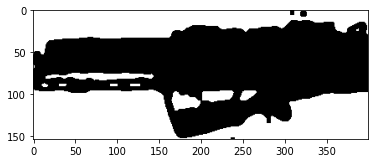

In [6]:
# flood fill
i = 0
floodList = []
suma = []
for image in edgeList:
    im_floodfill = image.copy()
    h, w = image.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    #print(h, w)
    seedH = int((h+1)/2)
    cv2.floodFill(im_floodfill, mask, (350, seedH-2), 0)
    cv2.floodFill(im_floodfill, mask, (200, seedH+5), 0)
    cv2.floodFill(im_floodfill, mask, (250, seedH-10), 0)
    cv2.floodFill(im_floodfill, mask, (170, seedH+10), 0)
    cv2.floodFill(im_floodfill, mask, (390, seedH+5), 0)
    floodList.append(im_floodfill)
    plt.imshow(im_floodfill, cmap = plt.cm.gray)
    plt.show()
        
    suma.append(0)
    for j in range(0,h):
        for jj in range(0,w):
            if floodList[i][j][jj] == 0:
                suma[i] = suma[i] + 1
    suma[i] = suma[i]/h
    i = i+1

In [7]:
#print(suma)
#print(hList)

In [8]:
##### PERCEPTRON
#### vector que viene del notebook de entrenamiento:
w = [-38.91251532, 117.6687482,  -54.71705489]
vectores = []
y = []
features = 2
for i in range(len(hList)):
    vectores.append([1, hList[i], suma[i]])
N = len(vectores)
xext = vectores
k = 1000
yTemp = []
for i in range(N):
    net = np.dot(xext[i], w)
    if (net >= 0):
        yTemp.append(1)
    else:
        yTemp.append(0)
    print(picName[i], yTemp[i])
yResult = np.asarray(yTemp)
print("Flechas en buen estado: ", yTemp.count(1))
print("Flechas en mal estado: ", yTemp.count(0))

img2/20221125_111950no.jpg 1
img2/20221125_112016si.jpg 1
img2/20221125_112028si.jpg 1
img2/20221125_112037no.jpg 1
img2/20221125_112046si.jpg 1
img2/20221125_112103si.jpg 1
img2/20221125_112109no.jpg 1
img2/20221125_112132si.jpg 1
img2/20221125_112133si.jpg 1
img2/20221125_112145si.jpg 1
img2/20221125_112158si.jpg 1
img2/20221125_112202si.jpg 1
img2/20221125_112213si.jpg 1
img2/20221125_112228si.jpg 1
img2/20221125_112239no.jpg 0
img2/20221125_112252no.jpg 1
img2/20221125_112302no.jpg 0
img2/20221125_112314si.jpg 1
img2/20221125_112327no.jpg 1
img2/20221125_112334no.jpg 0
img2/20221125_112347si.jpg 1
img2/20221125_112358no.jpg 1
img2/20221125_112408no.jpg 0
img2/20221125_112417si.jpg 1
img2/20221125_112426no.jpg 1
img2/20221125_112436no.jpg 1
img2/20221125_112447no.jpg 0
img2/20221125_112507si.jpg 1
img2/20221125_112517no.jpg 1
img2/20221125_112527no.jpg 1
img2/20221125_112540no.jpg 1
img2/20221125_112551no.jpg 1
Flechas en buen estado:  27
Flechas en mal estado:  5


Text(0.5, 1.0, 'Resultado obtenido')

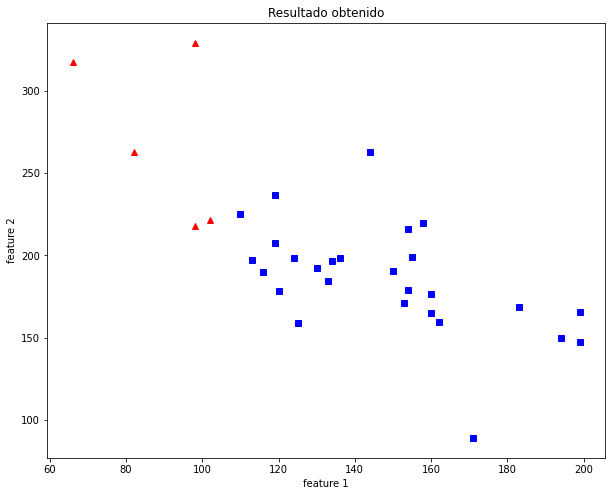

In [9]:
x = np.asarray(xext)
x = x[:, [1, 2]]

fig2 = plt.figure(figsize=(10,8))
plt.plot(x[:, 0][yResult == 0], x[:, 1][yResult == 0], 'r^')
plt.plot(x[:, 0][yResult == 1], x[:, 1][yResult == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Resultado obtenido')

In [17]:
# Multiples flechas
picList = os.listdir('multiples')
i = 0
imgList = []
picList = ['20221125_88888.jpg']
i = 0
print(picList)
for pic in picList:
    pic = "multiples/" + pic
    img1 = cv2.imread(pic)
    imgROI = cv2.resize(img1, (1200, 900), interpolation= cv2.INTER_LINEAR)

    rois = cv2.selectROIs("Select Rois",imgROI)
    #print(rois)
    cv2.destroyAllWindows()
    for rect in rois:
        x1=rect[0]
        y1=rect[1]
        x2=rect[2]
        y2=rect[3]
        img = imgROI[y1:y1+y2,x1:x1+x2]
        #plt.imshow(img_crop, cmap = plt.cm.gray)
        #plt.show()
        img = cv2.resize(img, (400, 300), interpolation= cv2.INTER_LINEAR)
        width = img.shape[1]
        height = img.shape[0]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        threshType, threshImg = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        filteredImg = cv2.bilateralFilter(threshImg, 5, 80, 80)
        noiselessImg = cv2.fastNlMeansDenoising(filteredImg, None, 50, 7, 21)
        imgList.append(noiselessImg)
        x = 0
        y = 0
        yfin = 0
        colSuma = np.sum(imgList[i], 0)
        for j in range(len(colSuma)) :
            if colSuma[j] < 255*(height-10) :
                x = j
                break
        y = 0
        for k in range(height) :
            for kk in range(width):
                if imgList[i][k, kk] == 0 :
                    y = k
                    break
            if y != 0:
                break
        yfin = 0
        for l in reversed(range(height)) :
            for ll in range(width):
                if imgList[i][l, ll] == 0 :
                    yfin = l
                    break
            if yfin != 0:
                break
        roi = [x, y, 400, yfin-y]
        #print(x, y, yfin)
        imgList[i] = imgList[i][int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]
        #plt.imshow(imgList[i], cmap = plt.cm.gray)
        #plt.show()
        i = i+1

['20221125_88888.jpg']


In [18]:
# deteccion de bordes
i = 0
edgeList = []
hList = []
for image in imgList:
    edge = cv2.Canny(image, 100,200)
    kernel = np.ones((5,5),np.uint8)
    edge = cv2.dilate(edge, kernel, iterations = 1)
    edge = cv2.medianBlur(edge, 5)
    edge = cv2.morphologyEx(edge, cv2.MORPH_OPEN, kernel)
    edgeList.append(cv2.bitwise_not(edge))
    width = edgeList[i].shape[1]
    height = edgeList[i].shape[0]
    x = 0
    y = 0
    colSuma = np.sum(edgeList[i], 0)
    for j in range(len(colSuma)) :
        if colSuma[j] < 255*(height-10) :
            x = j
            break
    filSuma = np.sum(edgeList[i], 1)
    for k in range(len(filSuma)) :
        for kk in range(width):
            if edgeList[i][k][kk] == 0 :
                y = k
                break
    for l in reversed(range(len(filSuma))) :
        for ll in range(width):
            if edgeList[i][l][ll] == 0 :
                yfin = l
                break
    roi = [x, yfin, 400, y-yfin]
    hList.append(y-yfin)
    edgeList[i] = edgeList[i][int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]
    #plt.imshow(edgeList[i], cmap = plt.cm.gray)
    #plt.show()
    i = i+1

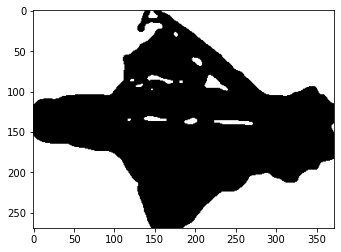

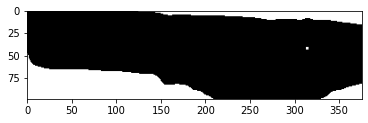

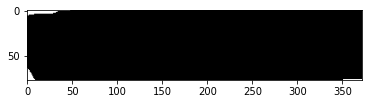

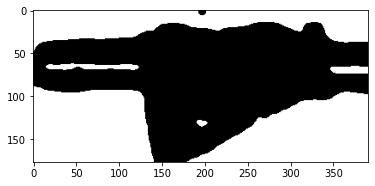

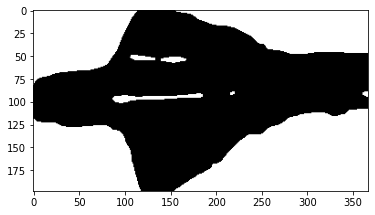

In [19]:
# flood fill
i = 0
floodList = []
suma = []
for image in edgeList:
    im_floodfill = image.copy()
    h, w = image.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    #print(h, w)
    seedH = int((h+1)/2)
    cv2.floodFill(im_floodfill, mask, (350, seedH-2), 0)
    cv2.floodFill(im_floodfill, mask, (250, seedH-10), 0)
    floodList.append(im_floodfill)
    plt.imshow(im_floodfill, cmap = plt.cm.gray)
    plt.show()
        
    suma.append(0)
    for j in range(0,h):
        for jj in range(0,w):
            if floodList[i][j][jj] == 0:
                suma[i] = suma[i] + 1
    suma[i] = suma[i]/h
    i = i+1

In [20]:
#print(suma)
#print(hList)

In [21]:
##### PERCEPTRON
#### vector que viene del notebook de entrenamiento:
w = [-38.91251532, 117.6687482,  -54.71705489]
vectores = []
y = []
for i in range(len(hList)):
    vectores.append([1, hList[i], suma[i]])
N = len(vectores)
xext = vectores
k = 1000
yTemp = []
for i in range(N):
    net = np.dot(xext[i], w)
    if (net >= 0):
        yTemp.append(1)
    else:
        yTemp.append(0)
    #print(picName[i], yTemp[i])
yResult = np.asarray(yTemp)
print("Flechas en buen estado: ", yTemp.count(1))
print("Flechas en mal estado: ", yTemp.count(0))

Flechas en buen estado:  3
Flechas en mal estado:  2


Text(0.5, 1.0, 'Resultado obtenido')

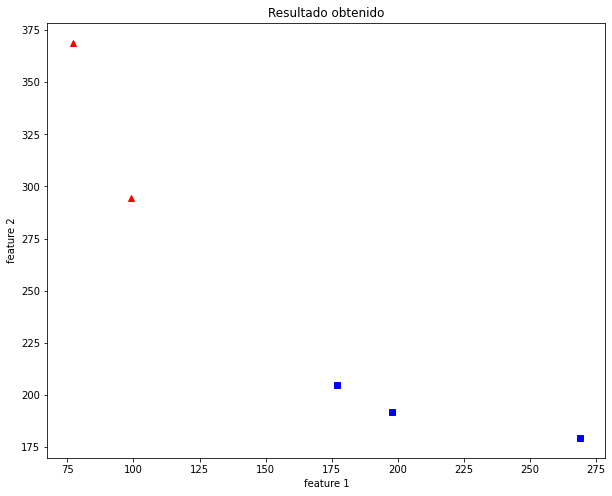

In [22]:
x = np.asarray(xext)
x = x[:, [1, 2]]

fig2 = plt.figure(figsize=(10,8))
plt.plot(x[:, 0][yResult == 0], x[:, 1][yResult == 0], 'r^')
plt.plot(x[:, 0][yResult == 1], x[:, 1][yResult == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Resultado obtenido')